In [61]:
import numpy as np
import pandas as pd
import seaborn as sns


from sklearn import preprocessing

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [20]:
df = pd.read_csv("asthma_dataset.csv")
df.head()

,Patient_ID,Age,Gender,Smoking_Status,Asthma_Diagnosis,Medication,Peak_Flow
0,1,26,Female,Non-Smoker,Yes,Inhaler,175
1,2,52,Female,Ex-Smoker,No,None,156
2,3,56,Female,Ex-Smoker,Yes,Inhaler,236
3,4,55,Male,Current Smoker,Yes,Controller Medication,378
4,5,43,Female,Current Smoker,No,None,159


In [21]:
df.shape

(300, 7)

In [22]:
df.describe()

,Patient_ID,Age,Peak_Flow
count,300.000000,300.000000,300.000000
mean,150.500000,39.666667,278.943333
std,86.746758,14.059675,72.861027
min,1.000000,18.000000,150.000000
25%,75.750000,27.000000,216.500000
50%,150.500000,39.000000,279.000000
75%,225.250000,51.000000,340.250000
max,300.000000,65.000000,400.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Patient_ID        300 non-null    int64 
 1   Age               300 non-null    int64 
 2   Gender            300 non-null    object
 3   Smoking_Status    300 non-null    object
 4   Asthma_Diagnosis  300 non-null    object
 5   Medication        300 non-null    object
 6   Peak_Flow         300 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 16.5+ KB


In [24]:
#checking for null values
df.isnull().sum()

Patient_ID          0
Age                 0
Gender              0
Smoking_Status      0
Asthma_Diagnosis    0
Medication          0
Peak_Flow           0
dtype: int64

In [25]:
#droppping medication column because it has a lot of null values
df = df.drop(columns={"Medication", "Patient_ID"}, axis=1)

In [26]:
df.head()

,Age,Gender,Smoking_Status,Asthma_Diagnosis,Peak_Flow
0,26,Female,Non-Smoker,Yes,175
1,52,Female,Ex-Smoker,No,156
2,56,Female,Ex-Smoker,Yes,236
3,55,Male,Current Smoker,Yes,378
4,43,Female,Current Smoker,No,159


Out target column "Asthma_Diagnosis" has categorical variables.to convert it to numerical data we have to do label encoding. we aslo have yo encode the "Gender","Smoking_Status".

In [27]:
df.describe()

,Age,Peak_Flow
count,300.000000,300.000000
mean,39.666667,278.943333
std,14.059675,72.861027
min,18.000000,150.000000
25%,27.000000,216.500000
50%,39.000000,279.000000
75%,51.000000,340.250000
max,65.000000,400.000000


In [28]:
label_encoder = preprocessing.LabelEncoder()

In [29]:
##converting categorial data to numerical data

df['Asthma_Diagnosis']= label_encoder.fit_transform(df['Asthma_Diagnosis'])
df['Asthma_Diagnosis'].unique()

array([1, 0])

In [30]:
df['Gender']= label_encoder.fit_transform(df['Gender'])
df['Gender'].unique()

array([0, 1])

In [31]:
df['Smoking_Status']= label_encoder.fit_transform(df['Smoking_Status'])
df['Smoking_Status'].unique()

array([2, 1, 0])

In [32]:
df.head()

,Age,Gender,Smoking_Status,Asthma_Diagnosis,Peak_Flow
0,26,0,2,1,175
1,52,0,1,0,156
2,56,0,1,1,236
3,55,1,0,1,378
4,43,0,0,0,159


<Axes: xlabel='Asthma_Diagnosis', ylabel='count'>

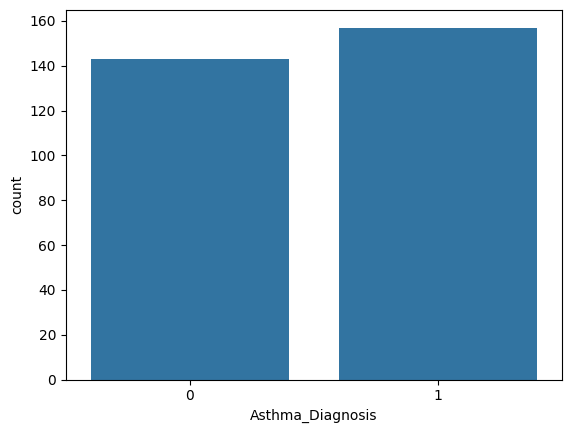

In [33]:
sns.countplot(x="Asthma_Diagnosis", data=df)

## model training

In [34]:
#splitting the dataset into target and features
X = df.drop(columns='Asthma_Diagnosis', axis=1)
Y = df['Asthma_Diagnosis']

In [35]:
#splitting data into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=2)

In [36]:
#logistic regression
model1 = LogisticRegression()


model1.fit(X_train, Y_train)

LogisticRegression()

In [37]:
#knn classifier
model2=KNeighborsClassifier()
model2.fit(X_train, Y_train)

KNeighborsClassifier()

In [38]:
#svm
model3=SVC()
model3.fit(X_train, Y_train)

SVC()

## model Evaluation


In [39]:
X_pred = model1.predict(X_test)
accuracy = accuracy_score(X_pred, Y_test)
print("Accuracy of model", accuracy)

Accuracy of model 0.5555555555555556


In [40]:
X_pred = model2.predict(X_test)
accuracy = accuracy_score(X_pred, Y_test)
print("Accuracy of model", accuracy)

Accuracy of model 0.5222222222222223


In [41]:
X_pred = model3.predict(X_test)
accuracy = accuracy_score(X_pred, Y_test)
print("Accuracy of model", accuracy)

Accuracy of model 0.5222222222222223


## predctive system

In [44]:
custom_input = (26,0,2,175)
input = np.asarray(custom_input)
input = input.reshape(1,-1)

pred = model1.predict(input)
print(pred)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [43]:
import pickle
filename="asthma_pred_model.sav"
pickle.dump(model1, open(filename, 'wb'))


## DEMO

In [125]:
# Data manipulation
#===============================================================================
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np

# Data visualization
#===============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
# from skimpy import skim

# Stats
#===============================================================================
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
# import pingouin as pg
# import ppscore as pps

# Data preprocessing
#===============================================================================
from sklearn.preprocessing import (OneHotEncoder,
                                   LabelEncoder)

from sklearn.preprocessing import (StandardScaler, MinMaxScaler,
                                   RobustScaler, PowerTransformer)

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibratedClassifierCV

# Models
#===============================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

# Metrics
#===============================================================================
from sklearn.metrics import (fbeta_score, balanced_accuracy_score,
                             confusion_matrix,
                             precision_recall_curve)

# Counter
#===============================================================================
from collections import Counter

# tqdm
#===============================================================================
from tqdm.auto import tqdm

# warnings
#===============================================================================
import warnings
warnings.filterwarnings('ignore')

In [126]:
data = pd.read_csv("asthma_dataset.csv")
data.head()

,Patient_ID,Age,Gender,Smoking_Status,Asthma_Diagnosis,Medication,Peak_Flow
0,1,26,Female,Non-Smoker,Yes,Inhaler,175
1,2,52,Female,Ex-Smoker,No,None,156
2,3,56,Female,Ex-Smoker,Yes,Inhaler,236
3,4,55,Male,Current Smoker,Yes,Controller Medication,378
4,5,43,Female,Current Smoker,No,None,159


In [127]:
data = data.drop(columns = ['Medication', 'Patient_ID'])

data.head()

,Age,Gender,Smoking_Status,Asthma_Diagnosis,Peak_Flow
0,26,Female,Non-Smoker,Yes,175
1,52,Female,Ex-Smoker,No,156
2,56,Female,Ex-Smoker,Yes,236
3,55,Male,Current Smoker,Yes,378
4,43,Female,Current Smoker,No,159


In [128]:
numerical_features = data.select_dtypes(include = ['int', 'float']).columns.to_list()
categorical_features = data.select_dtypes(include = ['object', 'category']).columns.to_list()

In [129]:
TARGET = 'Asthma_Diagnosis'
TEST_SIZE = 0.2
SEED = 123

X = data.drop(TARGET, axis = 1)
y = data[TARGET]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = TEST_SIZE,
                                                    random_state = SEED,
                                                    stratify = y)

In [130]:
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [131]:
from collections import Counter
print(f"y_train: {Counter(y_train)}")
print(f"y_test: {Counter(y_test)}")

y_train: Counter({1: 126, 0: 114})
y_test: Counter({1: 31, 0: 29})


In [132]:
numerical_predictors = X_train.select_dtypes(include = ['float','int']).columns.to_list()
categorical_predictors = X_train.select_dtypes(include = ['object', 'category']).columns.to_list()

In [136]:
# Transformations for the following models: LogisticRegression, SVM and KNN.
transformer = [('ohe',
                OneHotEncoder(drop = 'first',
                              handle_unknown = 'ignore',
                              sparse_output = False),
                categorical_predictors),

               ('scaler',
               MinMaxScaler(),
               numerical_predictors)]

In [137]:
# Preprocessor for the following models: LogisticRegression, SVM and KNN.
preprocessor = ColumnTransformer(transformers = transformer,
                                 remainder = 'passthrough',
                                 n_jobs = -1,
                                 verbose_feature_names_out = False).set_output(transform = 'pandas')


X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

In [138]:
clf1 = CalibratedClassifierCV(LogisticRegression(random_state = SEED))

clf2 = CalibratedClassifierCV(KNeighborsClassifier(n_jobs = -1))

clf3 = CalibratedClassifierCV(SVC(random_state = SEED,
                             probability = True))

MODELS1 = [clf1, clf2, clf3]

In [139]:
# Training !!!
for model in tqdm(MODELS1):
    name = type(model).__name__

    model.fit(X_train_prep.to_numpy(dtype = np.float32), y_train)

    y_pred_train = model.predict(X_train_prep.to_numpy(dtype = np.float32))
    y_pred_test = model.predict(X_test_prep.to_numpy(dtype = np.float32))


    score_train = fbeta_score(y_train, y_pred_train, beta = 2)
    score_test = fbeta_score(y_test, y_pred_test, beta = 2)

    print("==" * 30)
    print(f"\033[1;33m {name} \033[0;m :\n")
    print(f' F2 Train: {score_train:.4f} |',
          f'F2 Test: {score_test:.4f}\n')
    print("==" * 30)

  0%|          | 0/3 [00:00<?, ?it/s]

 CalibratedClassifierCV  :

 F2 Train: 0.7478 | F2 Test: 0.6061

 CalibratedClassifierCV  :

 F2 Train: 0.8311 | F2 Test: 0.8516

 CalibratedClassifierCV  :

 F2 Train: 0.8026 | F2 Test: 0.7386

